# 顧客テーブルの基礎集計
---
### 目次
- アンケートフラグの割合
- 男女比率
- 年代比率
- 都道府県比率
- 登録日の分布
- 退会者数

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

### 分析対象データ

In [2]:
member = pd.read_csv("/Users/TakayukiYagi/Developer/M1/competition/data/member.csv")
member.head()

,enquete_flag,customer_id,gender,age,registration_date,withdrawal_date,prefectures
0,1,5431,1,5,2008-07-26,NaN,4
1,1,65283,1,1,2015-01-03,NaN,10
2,1,66955,2,5,2015-01-28,NaN,12
3,1,38874,2,5,2013-02-04,NaN,27
4,1,48730,1,2,2013-12-20,NaN,47


### アンケートフラグの割合

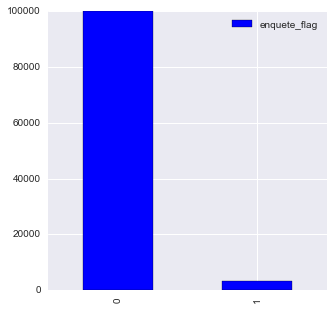

In [3]:
df = pd.DataFrame(member["enquete_flag"].value_counts()).plot(figsize=(5,5), kind='bar')

### 男女比率

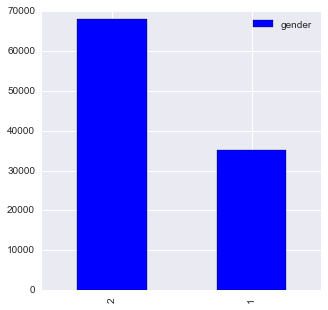

In [4]:
df = pd.DataFrame(member["gender"].value_counts()).plot(figsize=(5,5), kind='bar')

### 年代比率

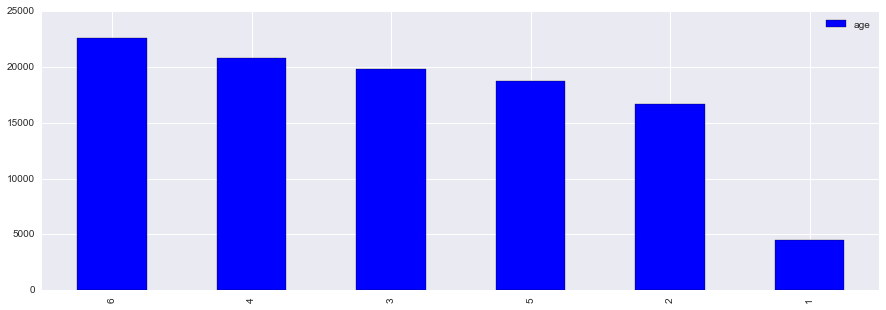

In [5]:
df = pd.DataFrame(member["age"].value_counts()).plot(figsize=(15,5), kind='bar')

### 都道府県比率

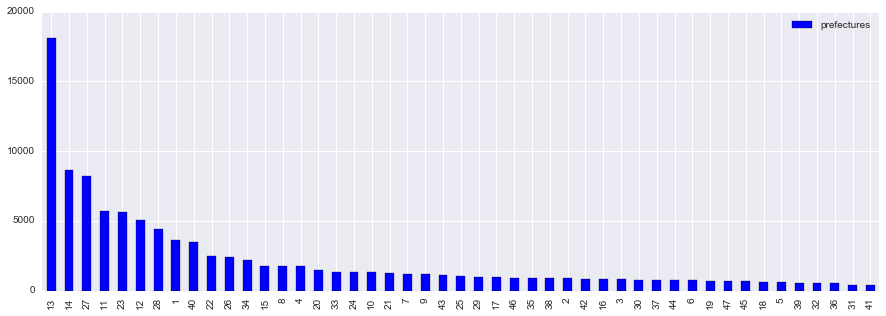

In [6]:
df = pd.DataFrame(member["prefectures"].value_counts()).plot(figsize=(15,5), kind='bar')

### 登録日の分布

In [7]:
df = pd.DataFrame(pd.to_datetime(member['registration_date']))

In [8]:
Min = min(df.registration_date)
Max = max(df.registration_date)

print("min : ", Min)
print("max : ", Max)
print("period : ", Max - Min)

min :  2000-06-11 00:00:00
max :  2016-03-16 00:00:00
period :  5757 days 00:00:00


### 年ごとの登録数の推移

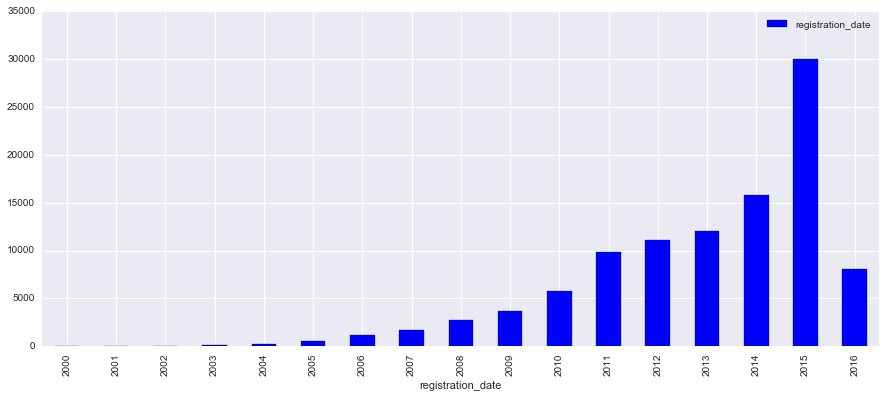

In [9]:
df.groupby([df.registration_date.dt.year]).count().plot(kind='bar', figsize=(15,6))

### 月ごとの登録数

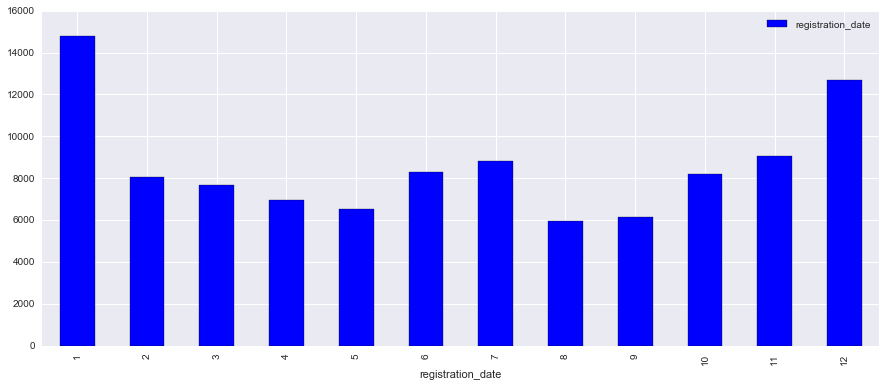

In [10]:
df.groupby([df.registration_date.dt.month]).count().plot(kind='bar', figsize=(15,6))

### 退会者数

In [11]:
print('length : ', len(member.dropna()))
member.dropna()

length :  11


,enquete_flag,customer_id,gender,age,registration_date,withdrawal_date,prefectures
497,1,61143,2,5,2014-10-14,2016-04-09,14
551,1,96296,2,5,2016-01-05,2016-04-01,2
887,1,22255,2,6,2011-09-01,2016-05-01,11
1289,1,73270,2,5,2015-05-01,2016-07-21,13
1519,1,103054,2,3,2016-03-14,2016-04-12,11
1549,1,51021,2,6,2014-02-02,2016-06-28,29
1949,1,97723,2,5,2016-01-15,2016-06-28,40
2014,1,37627,1,6,2013-01-06,2016-07-11,24
2138,1,20643,2,5,2011-06-23,2016-07-28,28
2175,1,44187,2,4,2013-08-01,2016-05-13,13
